**DATA1030 Final Project - Identifying Correlations between Race & Climate Risk**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import pylab as plt
import matplotlib
from matplotlib.colors import ListedColormap
import openpyxl

df_floodrisk = pd.read_csv('flood_v3.0_summary_fsf_flood_tract_summary.csv')
df_heatrisk = pd.read_csv('heat_v1.2_summary_fsf_heat_tract_summary.csv')
df_census_nullvals = pd.read_csv('./DECENNIALPL2020.P1_2023-10-12T191021/DECENNIALPL2020.P1-Data.csv', low_memory=False)

**Data Clean Up**

In [3]:
#Clean census data, get rid of 'null' annotation values
df_census_nullvals.replace('null', np.nan)
df_racedata = df_census_nullvals.dropna(axis='columns')
df_racedata = df_racedata.drop(1)

#Understand how census tracts are denoted:
#Census data refers to tract numbers under 'GEO_ID' column
#Climate datasets refer to tract numbers under 'fips' column

#Convert Census GEO_IDs to fips compatible with climate risk datasets:

def geo_id_to_fips(geo_id):
    gid_str = str(geo_id)
    
    if len(gid_str) == 20:
        tract_fips = int(geo_id[9:20])
        return tract_fips
    else:
        return 0

fips_series = df_racedata['GEO_ID'].apply(geo_id_to_fips)
df_racedata['fips'] = fips_series

#Create the target variable columns

def create_target_columns(dataframe, add_columns, div_column):
    sum_result = dataframe[add_columns].sum(axis=1)
    divide_by = dataframe[div_column] 
    percent = (sum_result / divide_by) * (divide_by > 0)
    
    return percent

high_flood_risk = create_target_columns(df_floodrisk, ['count_floodfactor5', 
                                                       'count_floodfactor6', 
                                                       'count_floodfactor7', 
                                                       'count_floodfactor8',
                                                       'count_floodfactor9',
                                                        'count_floodfactor10'], 
                                                        'count_property')

very_high_flood_risk = create_target_columns(df_floodrisk, ['count_floodfactor8',
                                                       'count_floodfactor9',
                                                        'count_floodfactor10'], 
                                                        'count_property')                                     

high_heat_risk = create_target_columns(df_heatrisk, ['count_heatfactor5', 
                                                       'count_heatfactor6', 
                                                       'count_heatfactor7', 
                                                       'count_heatfactor8',
                                                       'count_heatfactor9',
                                                        'count_heatfactor10'], 
                                                        'count_property')

very_high_heat_risk = create_target_columns(df_heatrisk, ['count_heatfactor8',
                                                       'count_heatfactor9',
                                                        'count_heatfactor10'], 
                                                        'count_property')

prptn_heat1 = create_target_columns(df_heatrisk, ['count_heatfactor1'],
                                                        'count_property')
                                                    
prptn_heat2 = create_target_columns(df_heatrisk, ['count_heatfactor2'],
                                                        'count_property')

prptn_heat3 = create_target_columns(df_heatrisk, ['count_heatfactor3'],
                                                        'count_property')

prptn_heat4 = create_target_columns(df_heatrisk, ['count_heatfactor4'],
                                                        'count_property')

prptn_heat5 = create_target_columns(df_heatrisk, ['count_heatfactor5'],
                                                        'count_property')

prptn_heat6 = create_target_columns(df_heatrisk, ['count_heatfactor6'],
                                                        'count_property')

prptn_heat7 = create_target_columns(df_heatrisk, ['count_heatfactor7'],
                                                        'count_property')

prptn_heat8 = create_target_columns(df_heatrisk, ['count_heatfactor8'],
                                                        'count_property')

prptn_heat9 = create_target_columns(df_heatrisk, ['count_heatfactor9'],
                                                        'count_property')

prptn_heat10 = create_target_columns(df_heatrisk, ['count_heatfactor10'],
                                                        'count_property')

prptn_flood1 = create_target_columns(df_floodrisk, ['count_floodfactor1'],
                                                        'count_property')

prptn_flood2 = create_target_columns(df_floodrisk, ['count_floodfactor2'],
                                                        'count_property')

prptn_flood3 = create_target_columns(df_floodrisk, ['count_floodfactor3'],
                                                        'count_property')

prptn_flood4 = create_target_columns(df_floodrisk, ['count_floodfactor4'],
                                                        'count_property')

prptn_flood5 = create_target_columns(df_floodrisk, ['count_floodfactor5'],
                                                        'count_property')

prptn_flood6 = create_target_columns(df_floodrisk, ['count_floodfactor6'],
                                                        'count_property')

prptn_flood7 = create_target_columns(df_floodrisk, ['count_floodfactor7'],
                                                        'count_property')

prptn_flood8 = create_target_columns(df_floodrisk, ['count_floodfactor8'],
                                                        'count_property')

prptn_flood9 = create_target_columns(df_floodrisk, ['count_floodfactor9'],
                                                        'count_property')

prptn_flood10 = create_target_columns(df_floodrisk, ['count_floodfactor10'],
                                                        'count_property')

df_floodrisk['high flood target'] = high_flood_risk
df_heatrisk['high heat target'] = high_heat_risk
df_floodrisk['very high flood target'] = very_high_flood_risk
df_heatrisk['very high heat target'] = very_high_heat_risk

df_floodrisk['proportion flood 1'] = prptn_flood1
df_floodrisk['proportion flood 2'] = prptn_flood2
df_floodrisk['proportion flood 3'] = prptn_flood3
df_floodrisk['proportion flood 4'] = prptn_flood4
df_floodrisk['proportion flood 5'] = prptn_flood5
df_floodrisk['proportion flood 6'] = prptn_flood6
df_floodrisk['proportion flood 7'] = prptn_flood7
df_floodrisk['proportion flood 8'] = prptn_flood8
df_floodrisk['proportion flood 9'] = prptn_flood9
df_floodrisk['proportion flood 10'] = prptn_flood10

df_heatrisk['proportion heat 1'] = prptn_heat1
df_heatrisk['proportion heat 2'] = prptn_heat2
df_heatrisk['proportion heat 3'] = prptn_heat3
df_heatrisk['proportion heat 4'] = prptn_heat4
df_heatrisk['proportion heat 5'] = prptn_heat5
df_heatrisk['proportion heat 6'] = prptn_heat6
df_heatrisk['proportion heat 7'] = prptn_heat7
df_heatrisk['proportion heat 8'] = prptn_heat8
df_heatrisk['proportion heat 9'] = prptn_heat9
df_heatrisk['proportion heat 10'] = prptn_heat10

#what parameters do we want to focus on?
df_racedata['P1_003N'] = pd.to_numeric(df_racedata['P1_003N'], errors='coerce')
df_racedata['P1_001N'] = pd.to_numeric(df_racedata['P1_001N'], errors='coerce')
df_racedata['P1_004N'] = pd.to_numeric(df_racedata['P1_004N'], errors='coerce')
df_racedata['P1_005N'] = pd.to_numeric(df_racedata['P1_005N'], errors='coerce')
df_racedata['P1_006N'] = pd.to_numeric(df_racedata['P1_006N'], errors='coerce')
df_racedata['P1_007N'] = pd.to_numeric(df_racedata['P1_007N'], errors='coerce')
df_racedata['P1_008N'] = pd.to_numeric(df_racedata['P1_008N'], errors='coerce')
df_racedata['P1_016N'] = pd.to_numeric(df_racedata['P1_016N'], errors='coerce')
df_racedata['P1_017N'] = pd.to_numeric(df_racedata['P1_017N'], errors='coerce')
df_racedata['P1_018N'] = pd.to_numeric(df_racedata['P1_018N'], errors='coerce')
df_racedata['P1_019N'] = pd.to_numeric(df_racedata['P1_019N'], errors='coerce')
df_racedata['P1_020N'] = pd.to_numeric(df_racedata['P1_020N'], errors='coerce')
df_racedata['P1_021N'] = pd.to_numeric(df_racedata['P1_021N'], errors='coerce')
df_racedata['P1_022N'] = pd.to_numeric(df_racedata['P1_022N'], errors='coerce')
df_racedata['P1_023N'] = pd.to_numeric(df_racedata['P1_023N'], errors='coerce')
df_racedata['P1_024N'] = pd.to_numeric(df_racedata['P1_024N'], errors='coerce')
df_racedata['P1_025N'] = pd.to_numeric(df_racedata['P1_025N'], errors='coerce')


pct_white = create_target_columns(df_racedata,['P1_003N'],'P1_001N')
pct_black = create_target_columns(df_racedata,['P1_004N'],'P1_001N')
pct_poc = create_target_columns(df_racedata,['P1_004N','P1_005N','P1_006N',
                                            'P1_007N','P1_008N','P1_016N',
                                            'P1_017N','P1_018N','P1_019N',
                                            'P1_020N','P1_021N','P1_022N',
                                            'P1_023N','P1_024N','P1_025N'],
                                            'P1_001N')
pct_indig = create_target_columns(df_racedata,['P1_005N'],'P1_001N')
pct_other = create_target_columns(df_racedata,['P1_008N'],'P1_001N')
black_white_prptn = create_target_columns(df_racedata,['P1_004N'],'P1_003N')
poc_white_prptn = create_target_columns(df_racedata,['P1_004N','P1_005N',
                                            'P1_006N','P1_007N','P1_008N',
                                            'P1_016N','P1_017N','P1_018N',
                                            'P1_019N','P1_020N','P1_021N',
                                            'P1_022N','P1_023N','P1_024N',
                                            'P1_025N'],'P1_003N')

df_racedata['percent white'] = pct_white
df_racedata['percent black'] = pct_black
df_racedata['percent poc'] = pct_poc
df_racedata['percent indigenous'] = pct_indig
df_racedata['percent some other race'] = pct_other
df_racedata['black:white'] = black_white_prptn
df_racedata['poc:white'] = poc_white_prptn

df_risks = pd.merge(df_floodrisk, df_heatrisk, on = 'fips', how='inner')
df = pd.merge(df_risks, df_racedata, on = 'fips', how='inner')

wanted_columns = ['fips','percent white','percent black','percent poc',
                'percent indigenous','percent some other race',
                'high flood target','high heat target',
                'very high flood target','very high heat target',
                'black:white','poc:white','proportion flood 1',
                'proportion flood 2','proportion flood 3','proportion flood 4',
                'proportion flood 5','proportion flood 6','proportion flood 7',
                'proportion flood 8','proportion flood 9','proportion flood 10',
                'proportion heat 1','proportion heat 2','proportion heat 3',
                'proportion heat 4','proportion heat 5','proportion heat 6',
                'proportion heat 7','proportion heat 8','proportion heat 9',
                'proportion heat 10',]

df = df.loc[:, wanted_columns]
#account for division by 0
df = df.fillna(0)
df.to_csv('climaterisk_racedata.csv', index=False)
print(df)

              fips  percent white  percent black  percent poc  \
0       1001020100       0.782535       0.120000     0.152113   
1       1001020200       0.409732       0.537226     0.561557   
2       1001020300       0.697761       0.222015     0.250000   
3       1001020400       0.842675       0.077014     0.098917   
4       1001020501       0.749884       0.146229     0.191115   
...            ...            ...            ...          ...   
83501  56043000200       0.896464       0.001911     0.045237   
83502  56043000301       0.814878       0.001283     0.090209   
83503  56043000302       0.851835       0.001359     0.080199   
83504  56045951100       0.907074       0.005995     0.057254   
83505  56045951300       0.905483       0.002856     0.038264   

       percent indigenous  percent some other race  high flood target  \
0                0.002817                 0.019718           0.230523   
1                0.000973                 0.009732           0.251327   


**1. Exploratory Data Analysis**

83506
32
fips                         int64
percent white              float64
percent black              float64
percent poc                float64
percent indigenous         float64
percent some other race    float64
high flood target          float64
high heat target           float64
very high flood target     float64
very high heat target      float64
black:white                float64
poc:white                  float64
proportion flood 1         float64
proportion flood 2         float64
proportion flood 3         float64
proportion flood 4         float64
proportion flood 5         float64
proportion flood 6         float64
proportion flood 7         float64
proportion flood 8         float64
proportion flood 9         float64
proportion flood 10        float64
proportion heat 1          float64
proportion heat 2          float64
proportion heat 3          float64
proportion heat 4          float64
proportion heat 5          float64
proportion heat 6          float64
proportion 

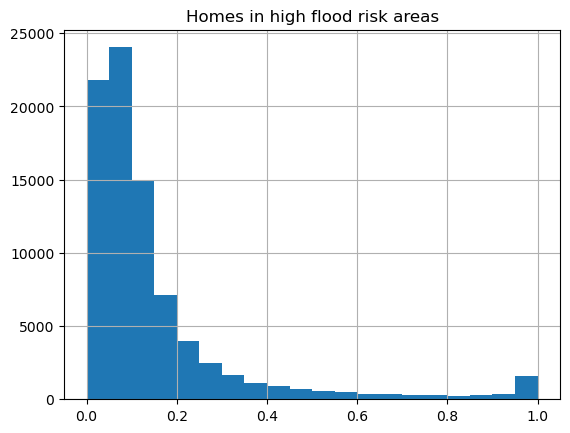

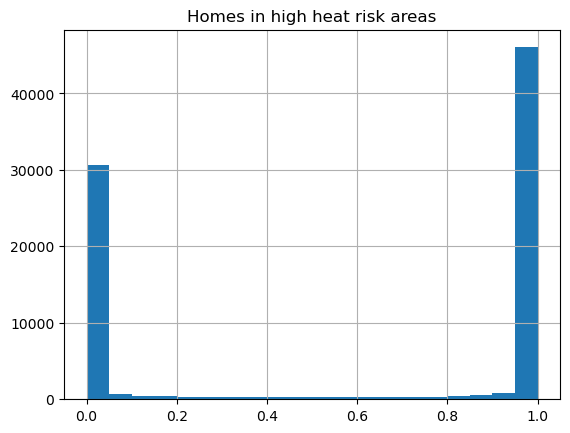

In [4]:
#How many rows and columns do we have in the dataframe?
rows = len(df.axes[0])
columns = len(df.axes[1])
print(rows)
print(columns)
#What are the data types of the columns?
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.dtypes)

#Identify Target Variables. Are they continuous or categorical?
#For this dataset, I want to look at two target variables.
#The 'Flood Risk' target variable shows the proportion of properties in a given census tract that have a risk rating of 5 or more.
#The 'Heat Risk' target variable shows the proportion of properties in a given census tract that have a risk rating of 5 or more.

#Visualise the target variable.
df['high flood target'].describe
df['high heat target'].describe

df.hist(column='high flood target',bins=20)
plt.title('Homes in high flood risk areas')
plt.xlabel('')
plt.ylabel('')
plt.show()

df.hist(column='high heat target',bins=20)
plt.title('Homes in high heat risk areas')
plt.xlabel('')
plt.ylabel('')
plt.show()

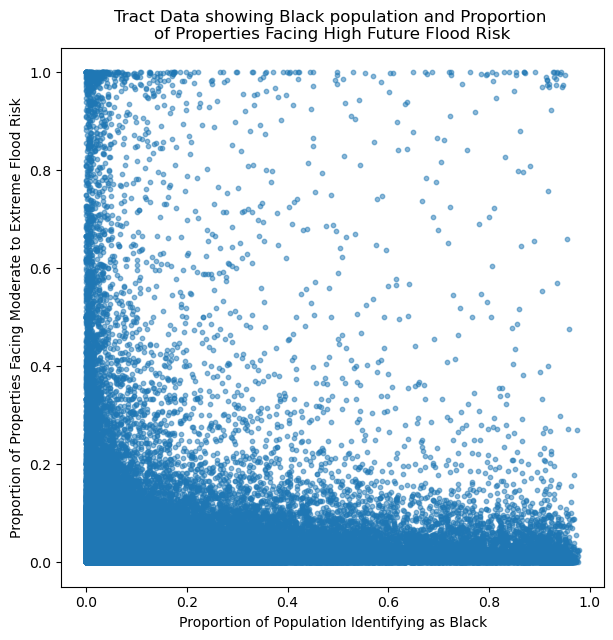

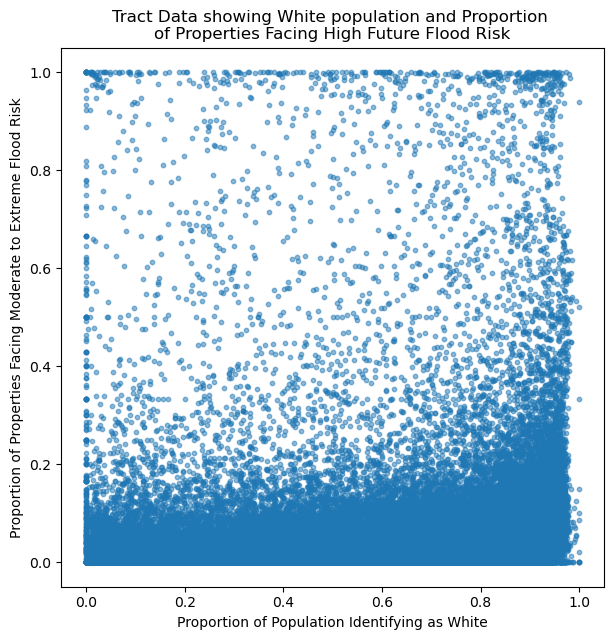

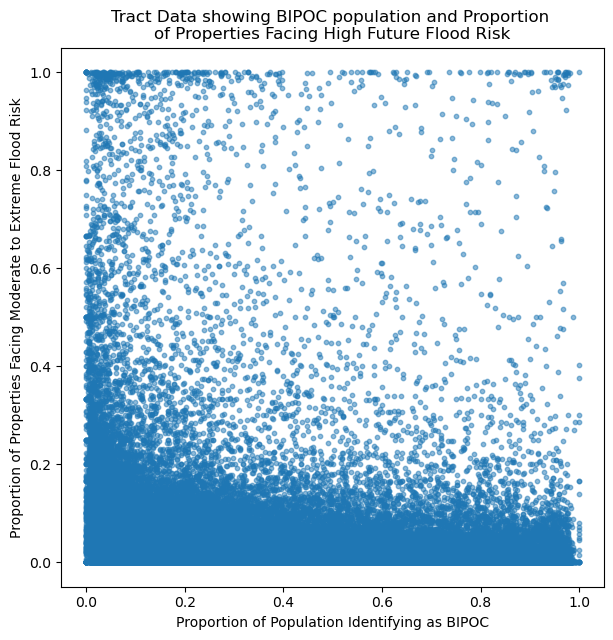

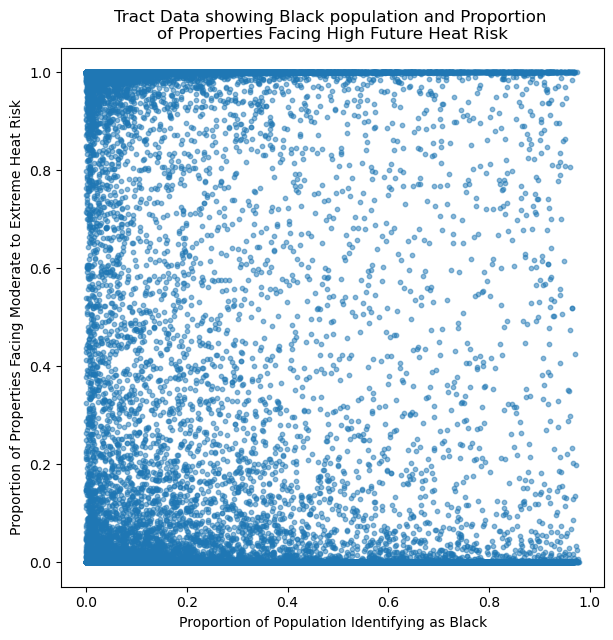

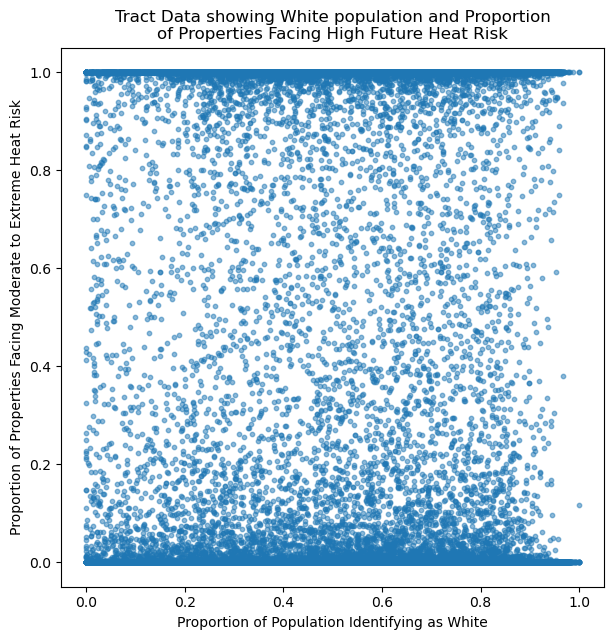

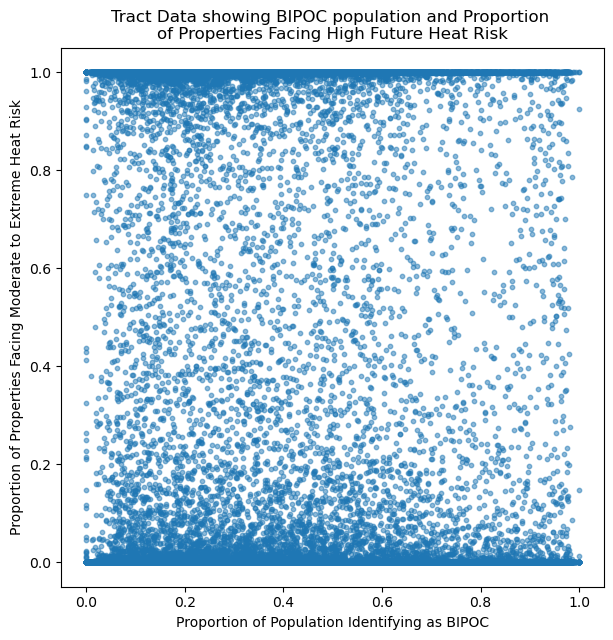

In [5]:
df.plot.scatter('percent black', 'very high flood target', figsize=(7,7), alpha=0.5, s=10)
plt.title('''Tract Data showing Black population and Proportion 
of Properties Facing High Future Flood Risk''')
plt.xlabel('Proportion of Population Identifying as Black')
plt.ylabel('Proportion of Properties Facing Moderate to Extreme Flood Risk')
plt.show()

df.plot.scatter('percent white', 'very high flood target', figsize=(7,7), alpha=0.5, s=10)
plt.title('''Tract Data showing White population and Proportion 
of Properties Facing High Future Flood Risk''')
plt.xlabel('Proportion of Population Identifying as White')
plt.ylabel('Proportion of Properties Facing Moderate to Extreme Flood Risk')
plt.show()

df.plot.scatter('percent poc', 'very high flood target', figsize=(7,7), alpha=0.5, s=10)
plt.title('''Tract Data showing BIPOC population and Proportion 
of Properties Facing High Future Flood Risk''')
plt.xlabel('Proportion of Population Identifying as BIPOC')
plt.ylabel('Proportion of Properties Facing Moderate to Extreme Flood Risk')
plt.show()

df.plot.scatter('percent black', 'very high heat target', figsize=(7,7), alpha=0.5, s=10)
plt.title('''Tract Data showing Black population and Proportion 
of Properties Facing High Future Heat Risk''')
plt.xlabel('Proportion of Population Identifying as Black')
plt.ylabel('Proportion of Properties Facing Moderate to Extreme Heat Risk')
plt.show()

df.plot.scatter('percent white', 'very high heat target', figsize=(7,7), alpha=0.5, s=10)
plt.title('''Tract Data showing White population and Proportion
of Properties Facing High Future Heat Risk''')
plt.xlabel('Proportion of Population Identifying as White')
plt.ylabel('Proportion of Properties Facing Moderate to Extreme Heat Risk')
plt.show()

df.plot.scatter('percent poc', 'very high heat target', figsize=(7,7), alpha=0.5, s=10)
plt.title('''Tract Data showing BIPOC population and Proportion 
of Properties Facing High Future Heat Risk''')
plt.xlabel('Proportion of Population Identifying as BIPOC')
plt.ylabel('Proportion of Properties Facing Moderate to Extreme Heat Risk')
plt.show()

plt.show()

**2. Split the data into different sets**

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
X = df.drop(columns=['high flood target', 'high heat target', 
                     'very high flood target', 'very high heat target', 
                     'proportion flood 1', 'proportion flood 2', 
                     'proportion flood 3', 'proportion flood 4', 
                     'proportion flood 5', 'proportion flood 6', 
                     'proportion flood 7', 'proportion flood 8', 
                     'proportion flood 9', 'proportion flood 10', 
                     'proportion heat 1', 'proportion heat 2', 
                     'proportion heat 3', 'proportion heat 4', 
                     'proportion heat 5', 'proportion heat 6', 
                     'proportion heat 7', 'proportion heat 8', 
                     'proportion heat 9', 'proportion heat 10'])
y = df['high heat target']
random_state = 42

X_train, X_other, y_train, y_other = train_test_split(X,y,\
                    train_size = 0.6,random_state = random_state)
print('training set:',X_train.shape, y_train.shape)
print(X_other.shape, y_other.shape)

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
                    train_size = 0.5,random_state = random_state)
print('validation set:',X_val.shape, y_val.shape) 
print('test set:',X_test.shape, y_test.shape) 

print(X_train.head())
print(df.columns.tolist())


training set: (50103, 8) (50103,)
(33403, 8) (33403,)
validation set: (16701, 8) (16701,)
test set: (16702, 8) (16702,)
              fips  percent white  percent black  percent poc  \
30613  20155000600       0.755071       0.056640     0.149254   
82714  55079185100       0.821091       0.038080     0.107256   
602     1073012306       0.131528       0.843340     0.856744   
71447  48117950400       0.460493       0.009967     0.290685   
82825  55089630202       0.896449       0.030388     0.059620   

       percent indigenous  percent some other race  black:white  poc:white  
30613            0.006506                 0.077306     0.075013   0.197669  
82714            0.008112                 0.034475     0.046378   0.130626  
602              0.001396                 0.003630     6.411890   6.513800  
71447            0.012142                 0.260602     0.021645   0.631248  
82825            0.003633                 0.010900     0.033898   0.066507  
['fips', 'percent white', '

In [7]:
# Identify groups -> grouped by state

def which_state(fips_code):
    str_fips = str(fips_code)
    
    if len(str_fips) == 10:
        fips = '0' + str_fips
    else:
        fips = str_fips
    
    fips_toabbv = {
        "01": "AL","02": "AK","04": "AZ","05": "AK","06": "CA","08": "CO","09": 
        "CT","10": "DE","11": "DC","12": "FL","13": "GA","15": "HI","16": "ID",
        "17": "IL","18": "IN","19": "IA","20": "KS","21": "KY","22": "LA",
        "23": "ME","24": "MD","25": "MA","26": "MI","27": "MN","28": "MS",
        "29": "MO","30": "MT","31": "NE","32": "NV","33": "NH","34": "NJ",
        "35": "NM","36": "NY","37": "NC","38": "ND","39": "OH","40": "OK",
        "41": "OR","42": "PA","44": "RI","45": "SC","46": "SD","47": "TN",
        "48": "TX","49": "UT","50": "VT","51": "VA","53": "WA","54": "WV",
        "55": "WI","56": "WY",}

    abbv = fips_toabbv.get(fips[:2])
    return abbv

#state_abbv = df['fips'].apply(which_state)
#df['state abbv'] = state_abbv

**3. Preprocess the the data**

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
print(scaler.transform(X_train))
print(scaler.transform(X_test))

[[3.47969924e-01 7.55070800e-01 5.80069196e-02 ... 7.73057788e-02
  4.89319446e-05 1.26791870e-04]
 [9.82436781e-01 8.21090581e-01 3.89993083e-02 ... 3.44749887e-02
  3.02528422e-05 8.37881245e-05]
 [1.30788075e-03 1.31527506e-01 8.63694431e-01 ... 3.63027087e-03
  4.18257638e-03 4.17819142e-03]
 ...
 [8.72795063e-01 8.69885193e-01 4.82371825e-03 ... 3.09096261e-02
  3.53199713e-06 4.34136595e-05]
 [1.59852332e-03 6.55402587e-01 2.28796269e-01 ... 2.06508135e-02
  2.22352049e-04 2.69068659e-04]
 [1.81669490e-01 4.67866324e-02 9.00396923e-01 ... 6.16966581e-03
  1.22578009e-02 1.27582488e-02]]
[[6.92052588e-01 6.85362517e-01 2.24441226e-01 ... 1.66894665e-02
  2.08584787e-04 2.36857907e-04]
 [8.56027975e-01 6.24855825e-01 9.68617369e-02 ... 6.31487889e-02
  9.87353744e-05 2.75282068e-04]
 [9.14906640e-02 3.65215479e-01 4.48115657e-02 ... 2.26473175e-01
  7.81522146e-05 8.89747399e-04]
 ...
 [5.12322577e-01 9.48606811e-01 4.75604806e-03 ... 4.64396285e-03
  3.19345164e-06 9.83927235e-06]

**4. Choose an evaluation metric**

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Use R2

**5. Choose one or more ML techniques**

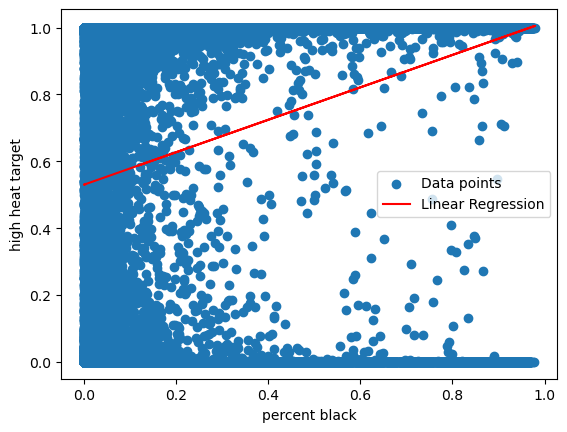

In [38]:
#Linear Regression

from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

LinReg_black_heatrisk = LinearRegression()

X = df[['percent black']]
y = df['high heat target']

LinReg_black_heatrisk.fit(X, y)
y_pred = LinReg_black_heatrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Linear Regression')

plt.xlabel('percent black')
plt.ylabel('high heat target')
plt.legend()
plt.savefig(fname='linregblackheatrisk', dpi=300)
plt.show()

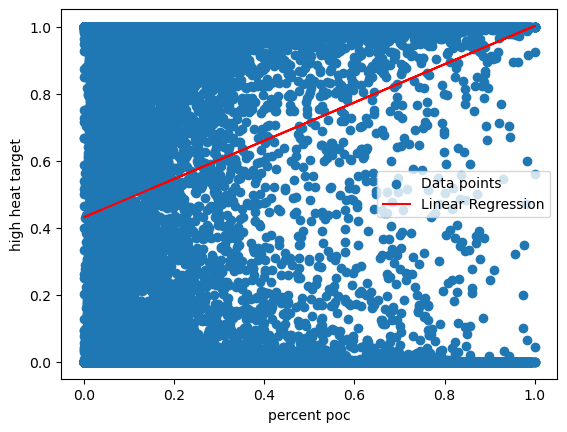

In [39]:
X = df[['percent poc']]
y = df['high heat target']

LinReg_poc_heatrisk = LinearRegression()

LinReg_poc_heatrisk.fit(X, y)
y_pred = LinReg_poc_heatrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Linear Regression')

plt.xlabel('percent poc')
plt.ylabel('high heat target')
plt.legend()
plt.savefig(fname='linregpocheatrisk', dpi=300)
plt.show()

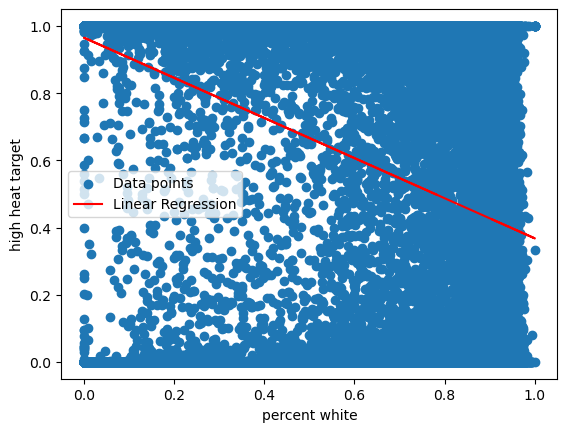

In [40]:
X = df[['percent white']]
y = df['high heat target']

LinReg_white_heatrisk = LinearRegression()

LinReg_white_heatrisk.fit(X, y)
y_pred = LinReg_white_heatrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Linear Regression')

plt.xlabel('percent white')
plt.ylabel('high heat target')
plt.legend()
plt.savefig(fname='linregwhiteheatrisk', dpi=300)
plt.show()

In [13]:
#Lasso Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(scaler.fit_transform(X), y)

best_alpha = grid_search.best_params_['alpha']
print(f"best alpha: {best_alpha}")


best alpha: 0.0001


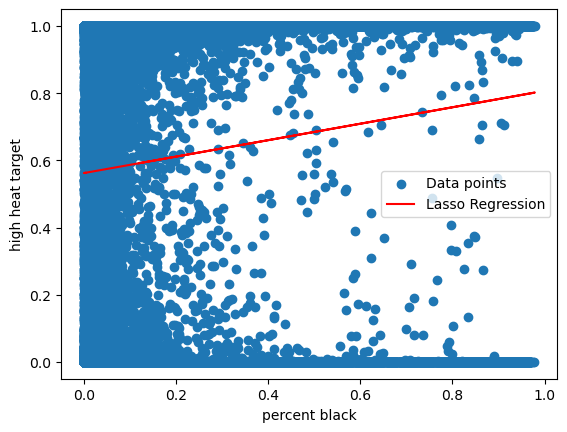

In [41]:
LassoReg_black_heatrisk = Lasso(alpha=0.01)

X = df[['percent black']]
y = df['high heat target']

LassoReg_black_heatrisk.fit(X, y)
y_pred = LassoReg_black_heatrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Lasso Regression')

plt.xlabel('percent black')
plt.ylabel('high heat target')
plt.legend()
plt.savefig(fname='lassoregblackheatrisk', dpi=300)
plt.show()

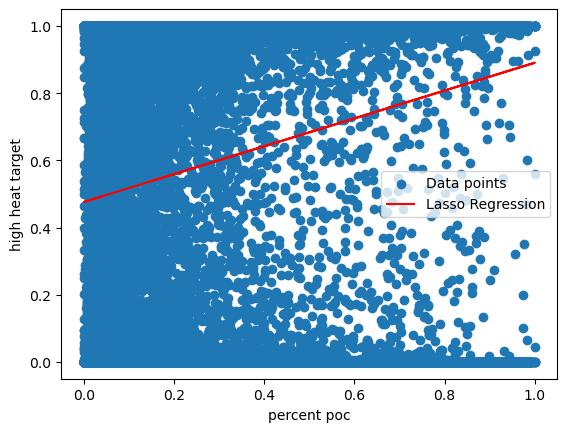

In [42]:
LassoReg_poc_heatrisk = Lasso(alpha=0.01)

X = df[['percent poc']]
y = df['high heat target']

LassoReg_poc_heatrisk.fit(X, y)
y_pred = LassoReg_poc_heatrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Lasso Regression')

plt.xlabel('percent poc')
plt.ylabel('high heat target')
plt.legend()
plt.savefig(fname='lassoregpocheatrisk', dpi=300)
plt.show()

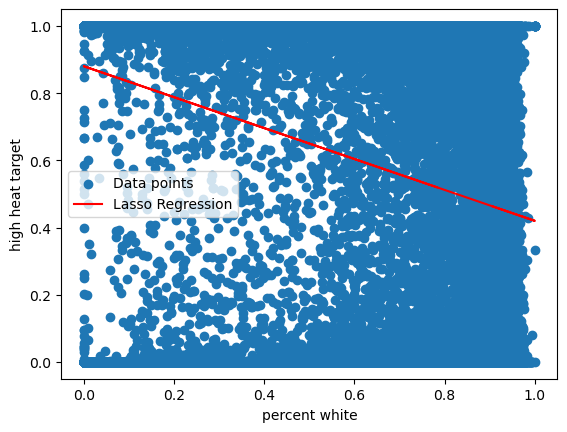

In [43]:
LassoReg_white_heatrisk = Lasso(alpha=0.01)

X = df[['percent white']]
y = df['high heat target']

LassoReg_white_heatrisk.fit(X, y)
y_pred = LassoReg_white_heatrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Lasso Regression')

plt.xlabel('percent white')
plt.ylabel('high heat target')
plt.legend()
plt.savefig(fname='lassoregwhiteheatrisk', dpi=300)
plt.show()

In [17]:
#Ridge Regression

from sklearn.linear_model import Ridge

scaler = StandardScaler()
alpha_values = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(scaler.fit_transform(X), y)

best_alpha = grid_search.best_params_['alpha']
print(f"best alpha: {best_alpha}")

/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pr

best alpha: 0


/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pr

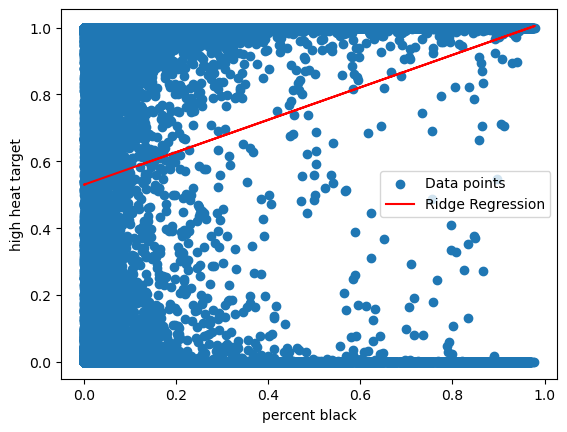

In [44]:
RidgeReg_black_heatrisk = Ridge(alpha=0.01)

X = df[['percent black']]
y = df['high heat target']

RidgeReg_black_heatrisk.fit(X, y)
y_pred = RidgeReg_black_heatrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Ridge Regression')

plt.xlabel('percent black')
plt.ylabel('high heat target')
plt.legend()
plt.savefig(fname='ridgeregblackheatrisk', dpi=300)
plt.show()

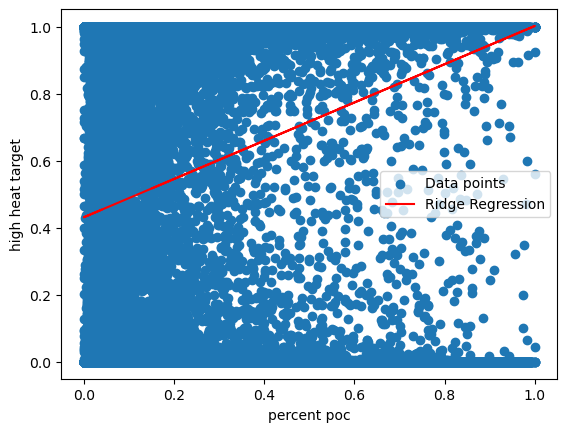

In [45]:
RidgeReg_poc_heatrisk = Ridge(alpha=0.01)

X = df[['percent poc']]
y = df['high heat target']

RidgeReg_poc_heatrisk.fit(X, y)
y_pred = RidgeReg_poc_heatrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Ridge Regression')

plt.xlabel('percent poc')
plt.ylabel('high heat target')
plt.legend()
plt.savefig(fname='ridgeregpocheatrisk', dpi=300)
plt.show()

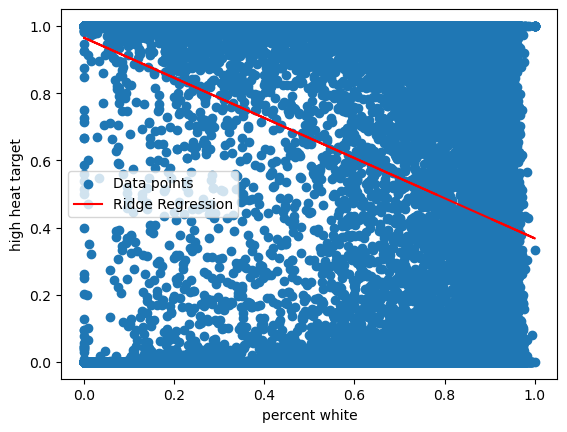

In [46]:
RidgeReg_white_heatrisk = Ridge(alpha=0.01)

X = df[['percent white']]
y = df['high heat target']

RidgeReg_white_heatrisk.fit(X, y)
y_pred = RidgeReg_white_heatrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Ridge Regression')

plt.xlabel('percent white')
plt.ylabel('high heat target')
plt.legend()
plt.savefig(fname='ridgeregwhiteheatrisk', dpi=300)
plt.show()

**6. Tune the hyperparameters of your ML models (aka cross-validation)**

In [21]:
#As shown in previous section:

#Lasso Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(scaler.fit_transform(X), y)

best_alpha = grid_search.best_params_['alpha']
print(f"best alpha (Lasso): {best_alpha}")


#Ridge Regression

from sklearn.linear_model import Ridge

scaler = StandardScaler()
alpha_values = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(scaler.fit_transform(X), y)

best_alpha = grid_search.best_params_['alpha']
print(f"best alpha (Ridge): {best_alpha}")


/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.740e+03, tolerance: 1.551e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the sol

best alpha (Lasso): 0
best alpha (Ridge): 0


/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jacquelinerice/anaconda3/envs/DATA1030/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pr

**7. Interpret your model**

In [22]:
#MSE in linear regression generalizes really well!

#In a regression the feature importance is just the weight that corresponds to the feature.

In [51]:
print('Linear Regression')

coefficients_lin_black = LinReg_black_heatrisk.coef_
print("(pct black) Coefficients (Weights):", coefficients_lin_black)

coefficients_lin_poc = LinReg_poc_heatrisk.coef_
print("(pct poc) Coefficients (Weights):", coefficients_lin_poc)

coefficients_lin_white = LinReg_white_heatrisk.coef_
print("(pct white) Coefficients (Weights):", coefficients_lin_white)

print('Lasso Regression')

coefficients_lasso_black = LassoReg_black_heatrisk.coef_
print("(pct black) Coefficients (Weights):", coefficients_lasso_black)

coefficients_lasso_poc = LassoReg_poc_heatrisk.coef_
print("(pct poc) Coefficients (Weights):", coefficients_lasso_poc)

coefficients_lasso_white = LassoReg_white_heatrisk.coef_
print("(pct white) Coefficients (Weights):", coefficients_lasso_white)

print('Ridge Regression')

coefficients_ridge_black = RidgeReg_black_heatrisk.coef_
print("(pct black) Coefficients (Weights):", coefficients_ridge_black)

coefficients_ridge_poc = RidgeReg_poc_heatrisk.coef_
print("(pct poc) Coefficients (Weights):", coefficients_ridge_poc)

coefficients_ridge_white = RidgeReg_white_heatrisk.coef_
print("(pct white) Coefficients (Weights):", coefficients_ridge_white)


Linear Regression
(pct black) Coefficients (Weights): [0.48499244]
(pct poc) Coefficients (Weights): [0.5704291]
(pct white) Coefficients (Weights): [-0.59735612]
Lasso Regression
(pct black) Coefficients (Weights): [0.24476065]
(pct poc) Coefficients (Weights): [0.41426731]
(pct white) Coefficients (Weights): [-0.45993016]
Ridge Regression
(pct black) Coefficients (Weights): [0.48499104]
(pct poc) Coefficients (Weights): [0.57042804]
(pct white) Coefficients (Weights): [-0.59735514]


What do the weights say about the relationship between the racial makeup and the climate risk?


Now, for flood risk:

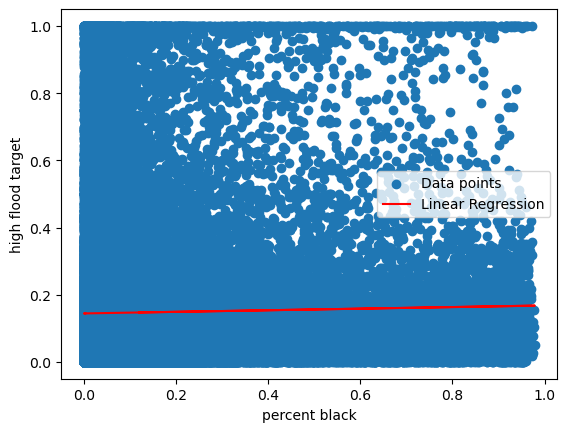

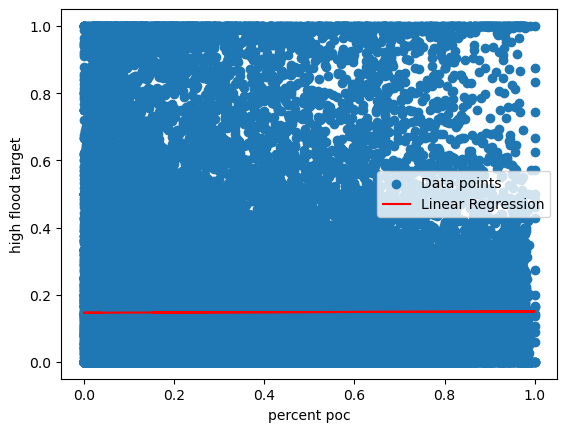

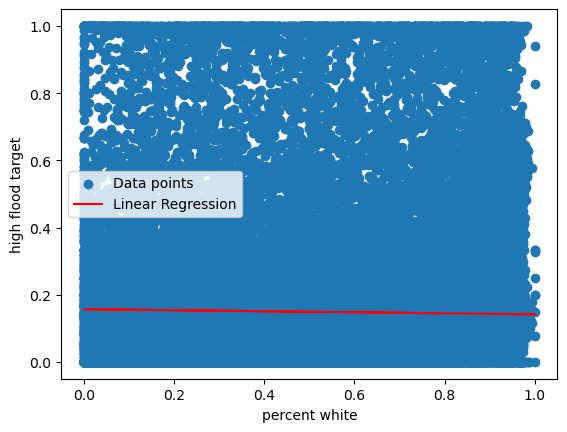

Linear Regression
(pct black) Coefficients (Weights): [0.02365077]
(pct poc) Coefficients (Weights): [0.00374849]
(pct white) Coefficients (Weights): [-0.01549012]


In [50]:
#Linear Regression

from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

LinReg_black_floodrisk = LinearRegression()

X = df[['percent black']]
y = df['high flood target']

LinReg_black_floodrisk.fit(X, y)
y_pred = LinReg_black_floodrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Linear Regression')

plt.xlabel('percent black')
plt.ylabel('high flood target')
plt.legend()
plt.savefig(fname='linregblackfloodrisk', dpi=300)
plt.show()

LinReg_poc_floodrisk = LinearRegression()

X = df[['percent poc']]
y = df['high flood target']

LinReg_poc_floodrisk.fit(X, y)
y_pred = LinReg_poc_floodrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Linear Regression')

plt.xlabel('percent poc')
plt.ylabel('high flood target')
plt.legend()
plt.savefig(fname='linregpocfloodrisk', dpi=300)
plt.show()

LinReg_white_floodrisk = LinearRegression()

X = df[['percent white']]
y = df['high flood target']

LinReg_white_floodrisk.fit(X, y)
y_pred = LinReg_white_floodrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Linear Regression')

plt.xlabel('percent white')
plt.ylabel('high flood target')
plt.legend()
plt.savefig(fname='linregwhitefloodrisk', dpi=300)
plt.show()

print('Linear Regression')

coefficients_lin_black = LinReg_black_floodrisk.coef_
print("(pct black) Coefficients (Weights):", coefficients_lin_black)

coefficients_lin_poc = LinReg_poc_floodrisk.coef_
print("(pct poc) Coefficients (Weights):", coefficients_lin_poc)

coefficients_lin_white = LinReg_white_floodrisk.coef_
print("(pct white) Coefficients (Weights):", coefficients_lin_white)

best alpha: 0.0001


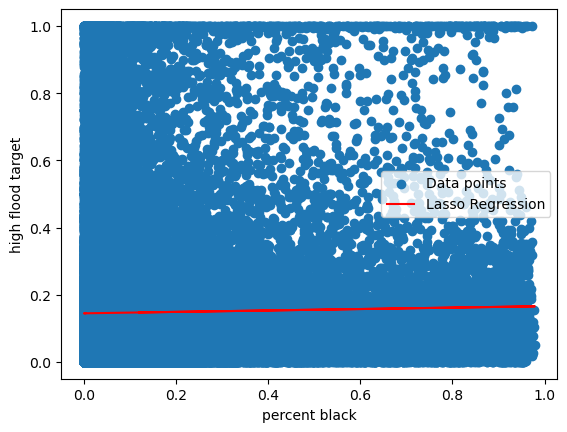

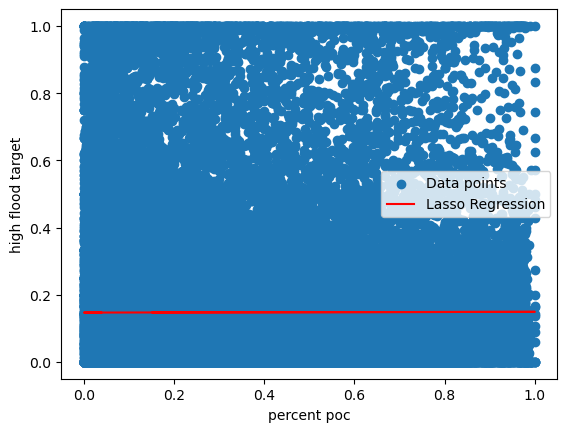

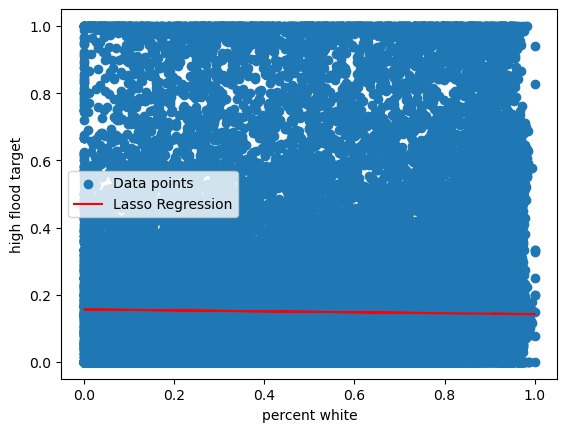

Lasso Regression
(pct black) Coefficients (Weights): [0.02124845]
(pct poc) Coefficients (Weights): [0.00218687]
(pct white) Coefficients (Weights): [-0.01411586]


In [48]:
LassoReg_black_floodrisk = Lasso(alpha=0.0001)

X = df[['percent black']]
y = df['high flood target']

LassoReg_black_floodrisk.fit(X, y)
y_pred = LassoReg_black_floodrisk.predict(X)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(scaler.fit_transform(X), y)

best_alpha = grid_search.best_params_['alpha']
print(f"best alpha: {best_alpha}")

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Lasso Regression')

plt.xlabel('percent black')
plt.ylabel('high flood target')
plt.legend()
plt.savefig(fname='lassoregblackfloodrisk', dpi=300)
plt.show()

LassoReg_poc_floodrisk = Lasso(alpha=0.0001)

X = df[['percent poc']]
y = df['high flood target']

LassoReg_poc_floodrisk.fit(X, y)
y_pred = LassoReg_poc_floodrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Lasso Regression')

plt.xlabel('percent poc')
plt.ylabel('high flood target')
plt.legend()
plt.savefig(fname='lassoregpocfloodrisk', dpi=300)
plt.show()

LassoReg_white_floodrisk = Lasso(alpha=0.0001)

X = df[['percent white']]
y = df['high flood target']

LassoReg_white_floodrisk.fit(X, y)
y_pred = LassoReg_white_floodrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Lasso Regression')

plt.xlabel('percent white')
plt.ylabel('high flood target')
plt.legend()
plt.savefig(fname='lassoregwhitefloodrisk', dpi=300)
plt.show()

print('Lasso Regression')

coefficients_Lasso_black = LassoReg_black_floodrisk.coef_
print("(pct black) Coefficients (Weights):", coefficients_Lasso_black)

coefficients_Lasso_poc = LassoReg_poc_floodrisk.coef_
print("(pct poc) Coefficients (Weights):", coefficients_Lasso_poc)

coefficients_Lasso_white = LassoReg_white_floodrisk.coef_
print("(pct white) Coefficients (Weights):", coefficients_Lasso_white)

best alpha: 100


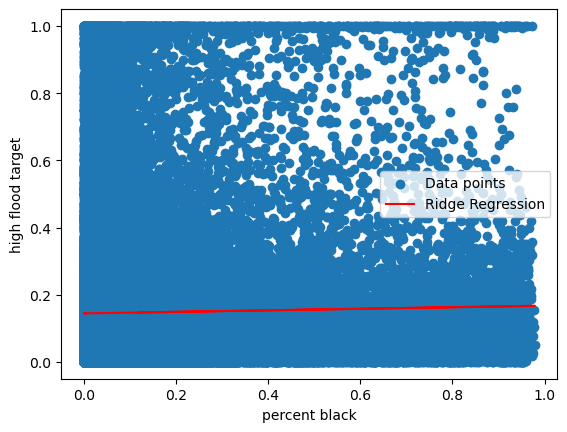

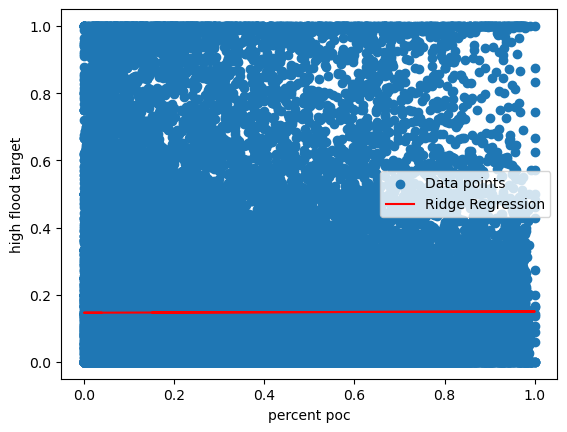

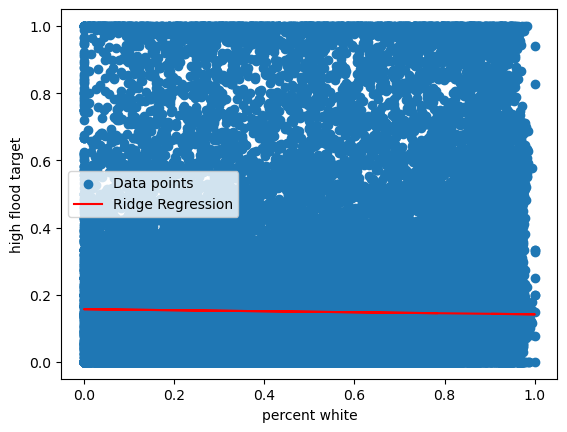

Ridge Regression
(pct black) Coefficients (Weights): [0.02298941]
(pct poc) Coefficients (Weights): [0.00367968]
(pct white) Coefficients (Weights): [-0.01523932]


In [49]:
RidgeReg_black_floodrisk = Ridge(alpha=100)

X = df[['percent black']]
y = df['high flood target']

RidgeReg_black_floodrisk.fit(X, y)
y_pred = RidgeReg_black_floodrisk.predict(X)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(scaler.fit_transform(X), y)

best_alpha = grid_search.best_params_['alpha']
print(f"best alpha: {best_alpha}")

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Ridge Regression')

plt.xlabel('percent black')
plt.ylabel('high flood target')
plt.legend()
plt.savefig(fname='ridgeregblackfloodrisk', dpi=300)
plt.show()

RidgeReg_poc_floodrisk = Ridge(alpha=100)

X = df[['percent poc']]
y = df['high flood target']

RidgeReg_poc_floodrisk.fit(X, y)
y_pred = RidgeReg_poc_floodrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Ridge Regression')

plt.xlabel('percent poc')
plt.ylabel('high flood target')
plt.legend()
plt.savefig(fname='ridgeregpocfloodrisk', dpi=300)
plt.show()

RidgeReg_white_floodrisk = Ridge(alpha=100)

X = df[['percent white']]
y = df['high flood target']

RidgeReg_white_floodrisk.fit(X, y)
y_pred = RidgeReg_white_floodrisk.predict(X)

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Ridge Regression')

plt.xlabel('percent white')
plt.ylabel('high flood target')
plt.legend()
plt.savefig(fname='ridgeregwhitefloodrisk', dpi=300)
plt.show()

print('Ridge Regression')

coefficients_Ridge_black = RidgeReg_black_floodrisk.coef_
print("(pct black) Coefficients (Weights):", coefficients_Ridge_black)

coefficients_Ridge_poc = RidgeReg_poc_floodrisk.coef_
print("(pct poc) Coefficients (Weights):", coefficients_Ridge_poc)

coefficients_Ridge_white = RidgeReg_white_floodrisk.coef_
print("(pct white) Coefficients (Weights):", coefficients_Ridge_white) 